In [1]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
from amftrack.util.sys import get_analysis_folders,get_time_plate_info_long_from_analysis,get_time_plate_info_from_analysis,get_time_hypha_info_from_analysis,get_global_hypha_info_from_analysis 
from amftrack.pipeline.final_analysis.hypha_speed_analysis import *
import matplotlib as mpl
import logging

logging.getLogger().setLevel(logging.WARNING)


C:\Users\coren\Documents\PhD\paper\travelling_wave\AMFTravellingWave\amftrack\util\dbx.py:3: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
all_analysis_folders = get_analysis_folders("data")
plates = [
"440_20230723",
"447_20230821",
"481_20231005",
"482_20230908",
]
analysis_folders = all_analysis_folders.loc[all_analysis_folders['unique_id'].isin(plates)]
folders,time_plate_info = get_time_plate_info_from_analysis(analysis_folders,use_saved=False)
time_plate_info = time_plate_info.replace(-1.0,np.nan)
width = 1.6
height = 1

In [ ]:
path_figure = r'C:\\Users\\coren\\AMOLF-SHIMIZU Dropbox\\HFSP_symbiotic-networks\\Article_TravellingWave\\Supplementary material\\extended_data_figures'

C:\Users\coren\AppData\Local\Temp\ipykernel_33344\523957433.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap2 = mpl.cm.get_cmap("winter")


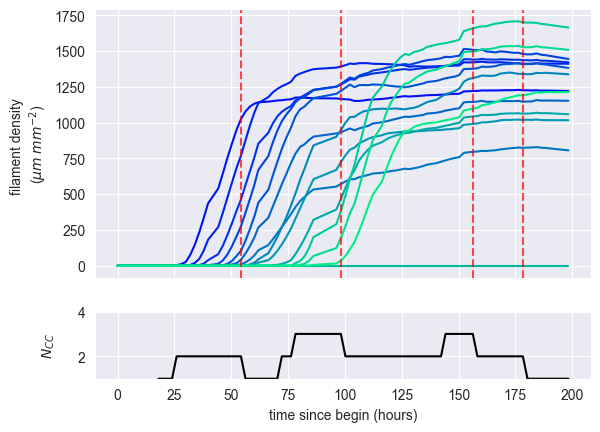

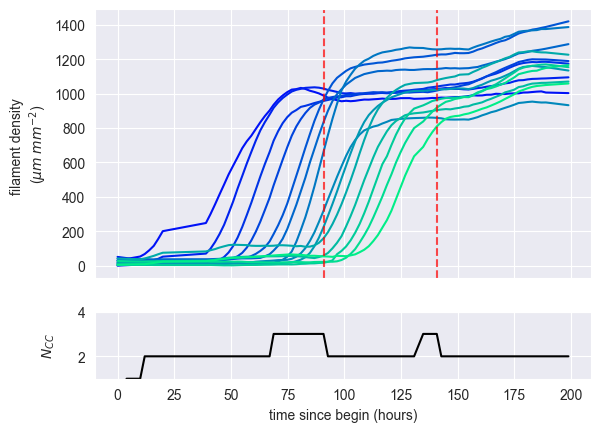

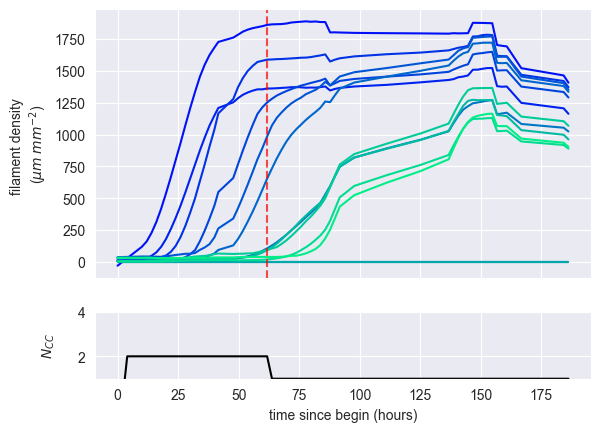

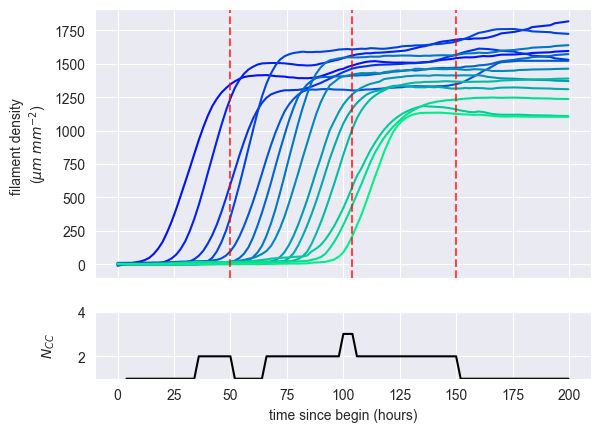

In [6]:
from scipy.signal import savgol_filter
width = 1.5
height = 1

# Assuming 'plates', 'time_plate_info', and 'j' are defined elsewhere in your code

cmap2 = mpl.cm.get_cmap("winter")
maxi = 15
for j in range(len(plates)):
    fig, (ax, ax2) = plt.subplots(2, 1, sharex=True,height_ratios=[0.8,0.2])

    plate = plates[j]
    table = time_plate_info.loc[time_plate_info["unique_id"] == int(plate)].copy()
    table["num_connected_roll"] = table["num connected"].rolling(3).max().fillna(0)
    table = table.set_index('timestep', drop=False)
    table = table[table["time_since_begin"] / pd.Timedelta(hours=1) <= 200]
    table = table.sort_values('time_since_begin')
    
    # Calculate the derivative of num_connected_roll
    time_hours = table["time_since_begin"] / pd.Timedelta(hours=1)
    num_connected_roll = table["num_connected_roll"].values
    num_connected_roll_derivative = np.diff(num_connected_roll)
    
    # Plot the data
    window_size = 11  # Adjust to your dataset
    poly_order = 1
    
    for index in range(1, maxi):
        column = f"ring_density_incr-100_index-{index}"
        table[column] = table[column].fillna(0)
        smoothed_values = savgol_filter(table[column], window_size, poly_order)
        ax.plot(
            time_hours,
            smoothed_values,
            color=cmap2(index/maxi),
        )
    
    ax2.plot(
        time_hours,
        num_connected_roll,
        color="black"
    )
    
    # Identify where derivative is negative and plot vertical lines on ax
    negative_derivative_indices = np.where(num_connected_roll_derivative < 0)[0]
    for idx in negative_derivative_indices:
        ax.axvline(x=time_hours.iloc[idx], color='red', linestyle='--', alpha=0.7)
    
    # Adjust labels and titles as necessary
    ax2.set_xlabel("time since begin (hours)")
    ax.set_ylabel('filament density \n($\mu m$ $mm^{-2}$)')  # Adjust labelpad as needed
    ax2.set_ylabel("$N_{CC}$", labelpad=15)  # Adjust labelpad as needed
    ax2.set_ylim(1,4)